In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf

# Data processing

In [3]:
df = pd.read_csv('data/Churn_Modelling.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [4]:
X = df.iloc[:, 3:-1].values
y = df.iloc[:, -1].values

In [5]:
X

array([[619, 'France', 'Female', ..., 1, 1, 101348.88],
       [608, 'Spain', 'Female', ..., 0, 1, 112542.58],
       [502, 'France', 'Female', ..., 1, 0, 113931.57],
       ...,
       [709, 'France', 'Female', ..., 0, 1, 42085.58],
       [772, 'Germany', 'Male', ..., 1, 0, 92888.52],
       [792, 'France', 'Female', ..., 1, 0, 38190.78]], dtype=object)

In [6]:
y

array([1, 0, 1, ..., 1, 1, 0])

In [7]:
#----------------
# Encoding Gender
#----------------

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
X[:, 2] = le.fit_transform(X[:, 2])

In [8]:
X

array([[619, 'France', 0, ..., 1, 1, 101348.88],
       [608, 'Spain', 0, ..., 0, 1, 112542.58],
       [502, 'France', 0, ..., 1, 0, 113931.57],
       ...,
       [709, 'France', 0, ..., 0, 1, 42085.58],
       [772, 'Germany', 1, ..., 1, 0, 92888.52],
       [792, 'France', 0, ..., 1, 0, 38190.78]], dtype=object)

In [9]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [10]:
ct = ColumnTransformer(transformers = [('encoder', OneHotEncoder(), [1])], remainder = 'passthrough')

In [11]:
X = ct.fit_transform(X)
X

array([[1.0, 0.0, 0.0, ..., 1, 1, 101348.88],
       [0.0, 0.0, 1.0, ..., 0, 1, 112542.58],
       [1.0, 0.0, 0.0, ..., 1, 0, 113931.57],
       ...,
       [1.0, 0.0, 0.0, ..., 0, 1, 42085.58],
       [0.0, 1.0, 0.0, ..., 1, 0, 92888.52],
       [1.0, 0.0, 0.0, ..., 1, 0, 38190.78]], dtype=object)

In [12]:
X

array([[1.0, 0.0, 0.0, ..., 1, 1, 101348.88],
       [0.0, 0.0, 1.0, ..., 0, 1, 112542.58],
       [1.0, 0.0, 0.0, ..., 1, 0, 113931.57],
       ...,
       [1.0, 0.0, 0.0, ..., 0, 1, 42085.58],
       [0.0, 1.0, 0.0, ..., 1, 0, 92888.52],
       [1.0, 0.0, 0.0, ..., 1, 0, 38190.78]], dtype=object)

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [14]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Train the Model

## ANN

In [15]:
ann = tf.keras.models.Sequential()

ann.add(tf.keras.layers.Dense(units = 9, activation = 'relu'))

ann.add(tf.keras.layers.Dense(units = 9, activation = 'relu'))

ann.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))

ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

ann.fit(X_train, y_train, batch_size = 32, epochs = 100)

Epoch 1/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 453us/step - accuracy: 0.4408 - loss: 0.7478
Epoch 2/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 415us/step - accuracy: 0.7997 - loss: 0.4986
Epoch 3/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 442us/step - accuracy: 0.8147 - loss: 0.4150
Epoch 4/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 417us/step - accuracy: 0.8213 - loss: 0.4101
Epoch 5/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 418us/step - accuracy: 0.8306 - loss: 0.3819
Epoch 6/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 414us/step - accuracy: 0.8466 - loss: 0.3707
Epoch 7/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 414us/step - accuracy: 0.8414 - loss: 0.3735
Epoch 8/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 414us/step - accuracy: 0.8579 - loss: 0.3497
Epoch 9/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 415us/step - accuracy: 0.8510 - loss: 0.3549
Epoch 10/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 506us/step - accuracy: 0.8599 - loss: 0.3387
Epoch 11/100
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 423us/step - accuracy: 0.8524 - loss: 0.3509
Epoch 12/100
250/25

In [16]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 599us/step
[[0 0]
 [0 1]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


In [17]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score

print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[1510   85]
 [ 199  206]]
0.858


In [18]:
cm = confusion_matrix(y_test, y_pred)

In [19]:
cm

array([[1510,   85],
       [ 199,  206]])

In [20]:
(cm[0, 0] + cm[1, 1]) / np.sum(cm)

np.float64(0.858)

In [21]:
cm[1, 1] / (cm[1, 1] + cm[1, 0])

np.float64(0.508641975308642)

In [22]:
rec = recall_score(y_test, y_pred)

In [23]:
precision_score(y_test, y_pred)

0.7079037800687286

# Explore Data

In [24]:
df = df.iloc[:, 3:]
df.head(10)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [25]:
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats	
# Improve quality of the plots
set_matplotlib_formats('svg')
# Set the style of the plot
plt.style.use('ggplot')

/var/folders/fx/39y8j8751j37c9vmjzj_2ftm0000gn/T/ipykernel_15645/3690350634.py:4: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('svg')


In [26]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'petroff10',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

<Axes: xlabel='Exited'>

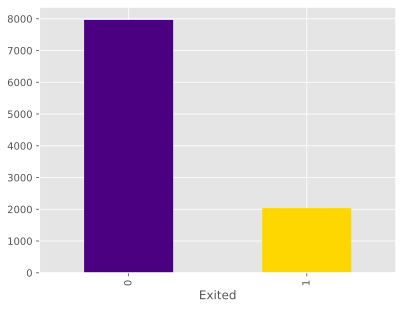

In [27]:
df.groupby(['Exited'])['Exited'].count().plot(kind = 'bar', color = ['indigo', 'gold'])

<Axes: xlabel='Gender'>

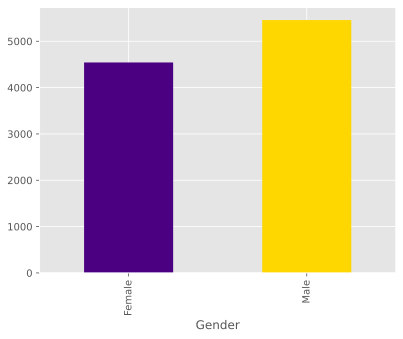

In [28]:
df.groupby(['Gender'])['Exited'].count().plot(kind =  'bar', color = ['indigo', 'gold'])

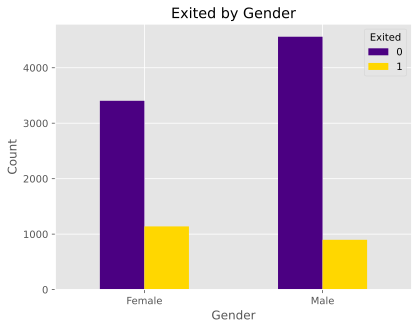

In [29]:
df.groupby(['Gender', 'Exited'])['Exited'].count().unstack().plot(kind = 'bar', color = ['indigo', 'gold'])
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Exited by Gender')
plt.xticks(rotation=0)
plt.show()

<Axes: xlabel='Geography'>

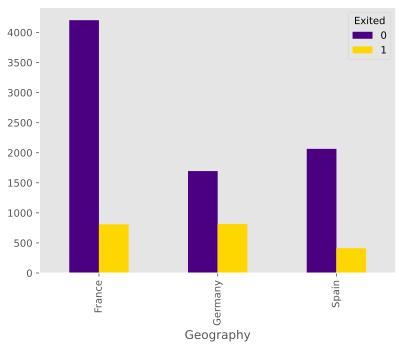

In [30]:
df.groupby(['Geography', 'Exited'])['Exited'].count().unstack().plot(kind = 'bar', color = ['indigo', 'gold'], grid = False)

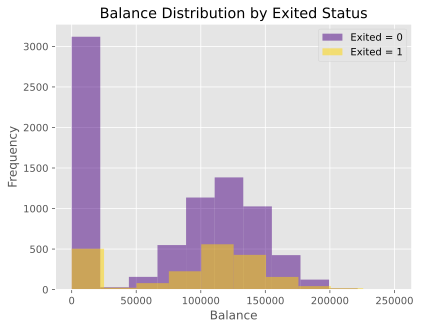

In [31]:
for group, color in zip(df.groupby('Exited'), ['indigo', 'gold']):
    group[1]['Balance'].plot(kind='hist', alpha=0.5, label=f'Exited = {group[0]}', color = color)

plt.xlabel('Balance')
plt.ylabel('Frequency')
plt.title('Balance Distribution by Exited Status')
plt.legend()
plt.show()

In [32]:
df.head(10)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


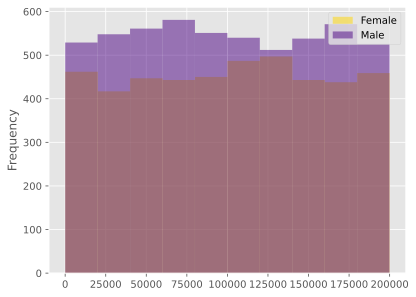

In [46]:
for group, color in zip(df.groupby('Gender'), ['gold', 'indigo']):
    group[1]['EstimatedSalary'].plot(kind = 'hist', label = group[0], alpha = 0.5, color =  color)

plt.legend()